# 9 · The Logarithmic Scale — The Lens for Chaos

**Observational record associated with the book**  
*Discovering Chaos in Prime Numbers — Computational Investigations through the Euler Mirror*  
© Alvaro Costa, 2025

This notebook is part of a canonical sequence of computational records.  
It introduces **no new hypotheses, conjectures, or interpretative models**.

Its sole purpose is to **record** the behaviour of arithmetic structures under an explicit,  
deterministic, and reproducible observational regime.

The complete conceptual reading is provided in the book.  
This notebook documents only the corresponding experiment.

**Licence:** Creative Commons BY–NC–ND 4.0  
Reading, execution, and citation are permitted.  
Modification, adapted redistribution, or independent commercial use are not permitted.


---

One of the most fundamental results of our investigation is the discovery that the “music” of chaos (GOE) is audible only through the  
logarithmic lens. But why should this be the case? What makes this scale so special?

The answer lies in the way prime numbers are distributed along the number line. To understand the effectiveness of the logarithmic lens,  
we must first visualise the *topography* of the prime landscape by measuring their density in both observational regimes: linear and  
logarithmic.

The code cell below generates this visual comparison. It provides the geometric key required to understand the fundamental condition  
for the emergence of quantum chaos in our system.


Generating primes up to 100,000,000...
-> 5,761,455 primes generated in 0.27 seconds.


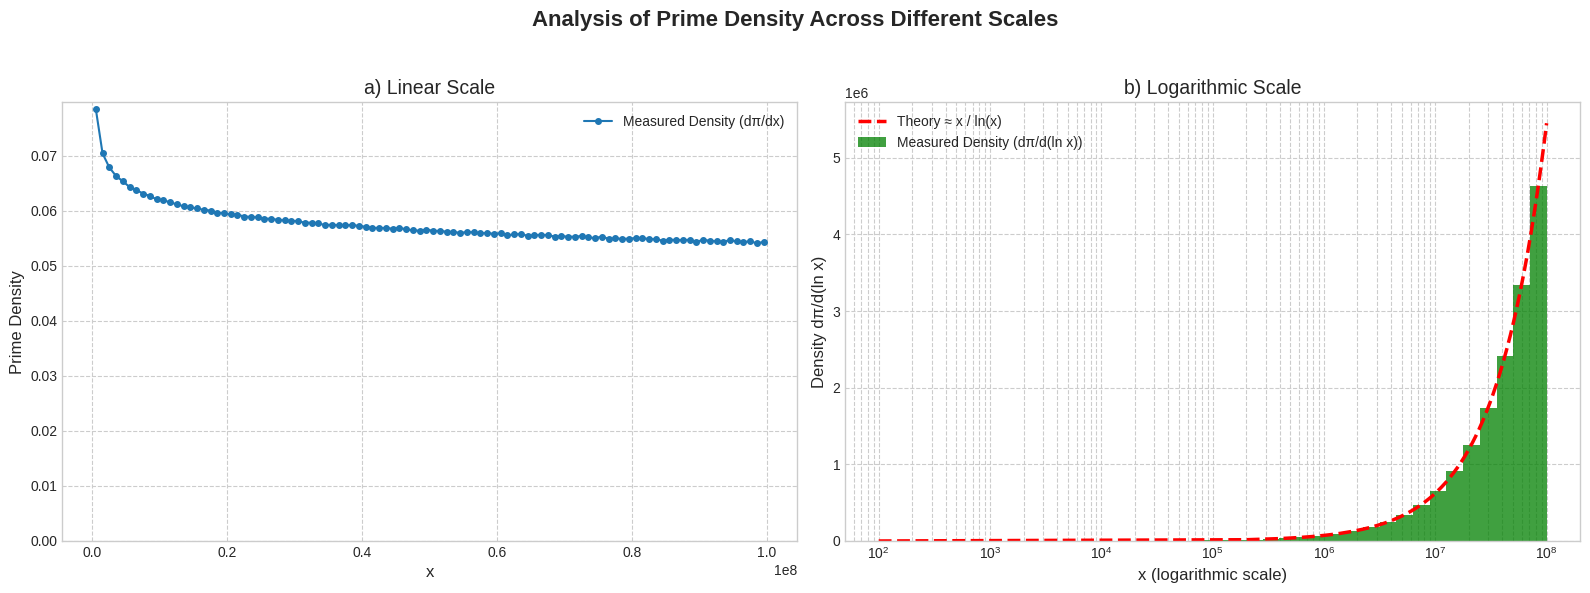

In [3]:
# Requirements: numpy, matplotlib

import numpy as np
import matplotlib.pyplot as plt
from math import isqrt
import time

# --- 1. OPTIMISED PRIME GENERATION FUNCTION ---
def generate_primes_upto(n: int) -> np.ndarray:
    """Generates an array containing all primes up to n using an optimised sieve."""
    if n < 2:
        return np.array([], dtype=np.int64)
    size = (n - 1) // 2
    sieve = np.ones(size, dtype=bool)
    limit = int(np.sqrt(n)) // 2
    for i in range(limit):
        if sieve[i]:
            p = 2 * i + 3
            start = (p * p - 3) // 2
            sieve[start::p] = False
    indices = np.where(sieve)[0]
    odd_primes = 2 * indices + 3
    return np.concatenate((np.array([2], dtype=np.int64), odd_primes))

# --- 2. PARAMETERS AND DATA GENERATION ---
X_MAX = 10**8
print(f"Generating primes up to {X_MAX:,}...")
start_time = time.time()
primes = generate_primes_upto(X_MAX)  # Generate the list of primes
end_time = time.time()
print(f"-> {len(primes):,} primes generated in {end_time - start_time:.2f} seconds.")

# --- 3. PLOT CONFIGURATION ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Analysis of Prime Density Across Different Scales",
             fontsize=16, weight='bold')

# --- 4. LEFT PLOT: LINEAR SCALE ---
ax = axes[0]
num_bins_linear = 100
bin_width_linear = X_MAX / num_bins_linear
bin_edges_linear = np.arange(0, X_MAX + 1, bin_width_linear).astype(np.int64)

# Compute counts in each bin using the prime list
prime_counts_linear, _ = np.histogram(primes, bins=bin_edges_linear)
densities_linear = prime_counts_linear / bin_width_linear
bin_centres_linear = bin_edges_linear[:-1] + bin_width_linear / 2

ax.plot(bin_centres_linear, densities_linear,
        'o-', markersize=4, label='Measured Density (dπ/dx)')
ax.set_title("a) Linear Scale", fontsize=14)
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("Prime Density", fontsize=12)
ax.legend()
ax.grid(True, which="both", ls="--")
ax.set_ylim(bottom=0)

# --- 5. RIGHT PLOT: LOGARITHMIC SCALE ---
ax = axes[1]
num_bins_log = 40
log_min = np.log(100)
log_max = np.log(X_MAX)
log_bin_edges = np.linspace(log_min, log_max, num_bins_log + 1)
bin_edges_log = np.exp(log_bin_edges).astype(np.int64)

# Compute counts and logarithmic density
prime_counts_log, _ = np.histogram(primes, bins=bin_edges_log)
log_bin_width = np.diff(log_bin_edges)  # Width of each bin in log-space
densities_log = prime_counts_log / log_bin_width
bin_centres_log = np.sqrt(bin_edges_log[:-1] * bin_edges_log[1:])

ax.bar(
    bin_edges_log[:-1],
    densities_log,
    width=np.diff(bin_edges_log),
    align='edge',
    alpha=0.75,
    label='Measured Density (dπ/d(ln x))',
    color='green'
)

# Add theoretical curve for comparison
x_theory = np.linspace(bin_edges_log[0], bin_edges_log[-1], 500)
y_theory = x_theory / np.log(x_theory)
scaling_factor = (
    np.mean(densities_log) /
    np.mean(bin_centres_log / np.log(bin_centres_log))
)
ax.plot(
    x_theory,
    y_theory * scaling_factor,
    color='red',
    lw=2.5,
    ls='--',
    label='Theory ≈ x / ln(x)'
)

ax.set_xscale('log')
ax.set_title("b) Logarithmic Scale", fontsize=14)
ax.set_xlabel("x (logarithmic scale)", fontsize=12)
ax.set_ylabel("Density dπ/d(ln x)", fontsize=12)
ax.legend()
ax.grid(True, which="both", ls="--")
ax.set_ylim(bottom=0)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


---

## Analysis of the Plots: From Density to Discovery

The two plots above reveal why the choice of scale is not a matter of preference, but a **fundamental necessity** for our investigation.  
They visually demonstrate the condition required for the emergence of the “music” of chaos (GOE).

### 1. The Linear Lens: A Collapsing Stage

The plot on the left shows a clear and unavoidable pattern. The density of primes (the number of primes per unit length, $ d\pi/dx $)  
visibly decays as $ x $ increases. As predicted by the Prime Number Theorem, the local density is approximately $ 1/\ln(x) $,
a function that tends to zero.

In this environment, the complex correlations characteristic of the GOE are suppressed. Attempting to analyse subtle statistics on a  
“terrain” whose defining feature is continuous collapse is like trying to listen to an orchestra while the stage itself is falling apart.  
The “rules of the game” are not stable, and only the simple, uncorrelated Poisson “noise” can be heard.

### 2. The Logarithmic Lens: The Emergence of a New Order

The plot on the right may at first appear surprising. It does not show a constant line, but rather a **growing** trend. Far from being an  
error, this is precisely the theoretically expected behaviour—and the key to the entire investigation.

* **The Reason (The Mathematics of the Transformation):**  
  This increasing trend is a direct mathematical consequence of the change of scale itself. Switching from a linear ruler to a logarithmic  
  one “stretches” intervals as we move forward. Mathematics tells us how to compensate for this stretching: the density in logarithmic scale  
  $ d\pi/d(\ln x) $ is related to the linear density $ d\pi/dx $ by a conversion factor equal to $ x $ itself:
  $$
  \frac{d\pi}{d(\ln x)} = x \cdot \frac{d\pi}{dx}.
  $$  
  Since we know that $ d\pi/dx \approx 1/\ln(x) $, it follows that:  
  $$
  \frac{d\pi}{d(\ln x)} \approx x \cdot \frac{1}{\ln(x)} = \frac{x}{\ln(x)}.
  $$  
  The function $ y = x/\ln(x) $ is **strictly increasing**, and the plot confirms that the empirical data follows this law remarkably well.

* **The Consequence (A Stable Stage):**  
  The “naturalness” of this scale does not lie in making the density perfectly constant, but in transforming a **collapse** into a **smooth,  
  well-defined growth law**. It is this predictable order that creates a “level playing field”—a stable background against which statistical  
  *fluctuations* (the true source of the GOE) can be meaningfully observed.

### The Condition for Chaos

This explains why the transition from Poisson to GOE, observed in earlier chapters, consistently occurs around $ 10^5 $–$ 10^6 $.  
It is in this region that the distribution of primes reaches a “critical mass” and begins to obey this smooth growth law robustly.  
Below this scale, the “terrain” remains too granular and irregular.

Once the stage is finally stabilised beyond $ 10^5 $, the orchestra of primes—properly tuned—can at last perform the music of quantum chaos.
